# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

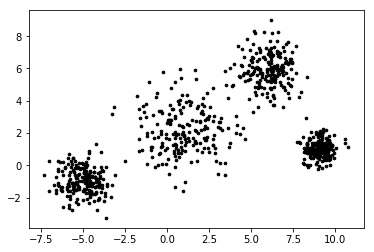

In [7]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

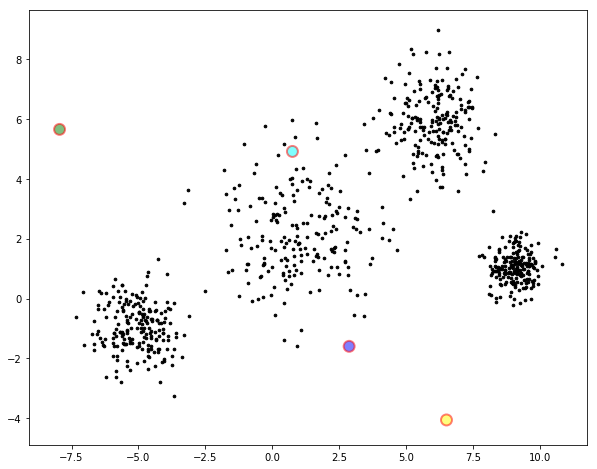

In [8]:
centre_random = np.array([2,2])

# Generate random centres
np.random.seed(6)
randomcentre1 = np.random.randn(1,2) * 4 + centre_random
randomcentre2 = np.random.randn(1,2) * 4 + centre_random
randomcentre3 = np.random.randn(1,2) * 4 + centre_random
randomcentre4 = np.random.randn(1,2) * 4 + centre_random

centres = np.concatenate((randomcentre1, randomcentre2, randomcentre3, randomcentre4), axis = 0)


# Show new generated random centres in Cyan, Blue, Green, and Yellow

fig = plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(centres[:,0], centres[:,1], s=120, c=['cyan','blue','green', 'yellow'],edgecolors='red',linewidth='2', alpha=0.5)

plt.show()

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

__K-means__ is a method to cluster set of data into __k__ number of cluster, where each data point is allocated to the nearest cluster that has similarity. In this notebook, the process of clustering using K-means algorithm will be demonstrated. The data that has been randomly generated in section 1 will be used and clustered into 4 cluster (k=4).

The mechanism of __K-means__:
1. Choose any random k centres as the initial step.
2. Assign each data to the nearest centres, so the data will be clustered into k clusters.
3. Get the means of each new cluster to be the new centres.
4. Assign each data to the nearest new centres, and k new clusters will be made.
5. Do step #2 - #4 until the centres are on its stable position (Where they do not move anymore).
6. The clustering result of step #5 is the final clustering where no data is moving to another cluster, meaning that the data has been assigned to the right cluster where they have the similarity.

<img src="data/kmeansflowchart.png" width="500">
<center>
Flowchart of K-Means (A. Bustamam, H. Tasman, N. Yuniarti, Frisca, and I. Mursidah, 2017)
</center>

iteration # 1


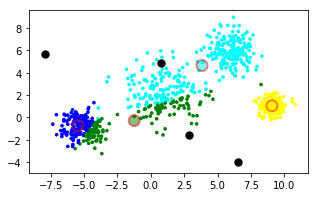

iteration # 2


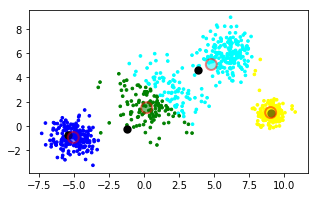

iteration # 3


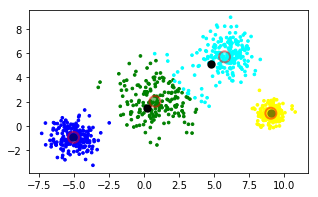

iteration # 4


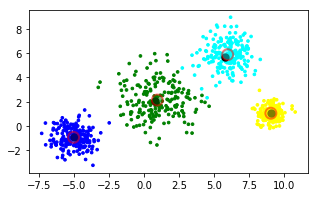

iteration # 5


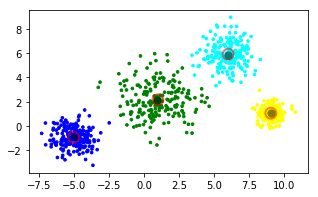

iteration # 6


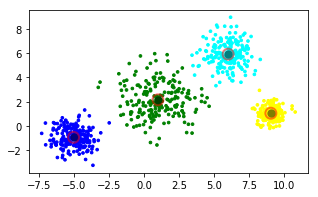

In [13]:
# Our data and centres
data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)
centres = np.concatenate((randomcentre1, randomcentre2, randomcentre3, randomcentre4), axis = 0)

# Number of Cluster
k=4

#For Iteration Numbering
m=0

#Loop used to to the iteration
while True:
    #Assign each data on 'data' to the nearest 'centres' to make a temporary cluster
    cluster = pairwise_distances_argmin(data, centres)
    
    #Look for new centres in each temporary cluster
    new_centres = np.array([data[cluster == i].mean(axis = 0) for i in range(k)])
    
    #Visualisation
    fig = plt.figure(figsize=(5,3)) #Size of figure
    
    #Iteration numbering
    n=m+1
    print ('iteration #',n)
    
    #Colors set for each cluster
    colors=['cyan','green','blue', 'yellow']
    
    #Each point colored based on its cluster
    plt.scatter(data[:,0], data[:,1], s=7, c=cluster, cmap=matplotlib.colors.ListedColormap(colors))
    
    #Old Centres Colored in Black
    plt.scatter(centres[:,0], centres[:,1], s=40, c='black',edgecolors='black',linewidth='2')
    
    #New Centres Colored in its cluster color and with red edgecolor
    plt.scatter(new_centres[:,0], new_centres[:,1], s=120, c=['cyan','green','blue', 'yellow'],edgecolors='red',linewidth='2', alpha=0.5) #New centres
    plt.show()
    
    if np.all(centres == new_centres): #When the new centres is the same as the previous centres, then final clustered is made
        break
    
    centres = new_centres
    m=n


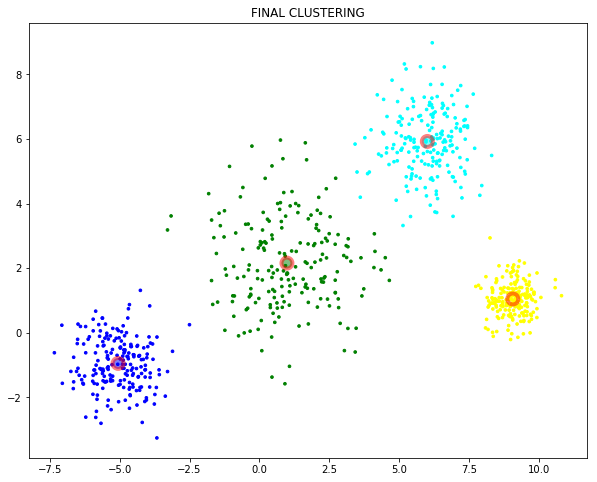

In [15]:
# Final Cluster

fig = plt.figure(figsize=(10,8))
    
plt.title("FINAL CLUSTERING")

#Each point colored based on its cluster
plt.scatter(data[:,0], data[:,1], s=7, c=cluster, cmap=matplotlib.colors.ListedColormap(colors))

# Centres of each cluster shown in red circle
plt.scatter(new_centres[:,0], new_centres[:,1], s=120, c=['cyan','green','blue', 'yellow'],edgecolors='red',linewidth='4', alpha=0.5)
plt.show()